<a href="https://colab.research.google.com/github/GDharan10/Dataset17_ProductivityPredictionOfGarmentEmployees_/blob/main/ProductivityPredictionOfGarmentEmployees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [ ]:
pip install lazypredict

# **Librarys**

In [81]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

#Machine Learning Training
from sklearn.ensemble import ExtraTreesRegressor

#Machine Learning Evaluation
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# **Connections**

In [ ]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [ ]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/garments_worker_productivity.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# **DataFrame observation**


In [ ]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
for column in df.columns:
  print(column,'---',df[column].unique())
  print('---------------------------')

In [ ]:
# Dependent - actual_productivity

continuous_columns = ['team', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
                      'no_of_workers', 'actual_productivity']
category_columns = ['date', 'quarter', 'department', 'day', 'targeted_productivity', 'no_of_style_change']

#Supervised Regression

# **Data cleaning using pandas**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df.wip.fillna(0, inplace = True)

In [ ]:
df.wip.isnull().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [ ]:
encode = OrdinalEncoder()
df.quarter = encode.fit_transform(df[["quarter"]])
df.department = encode.fit_transform(df[["department"]])
df.day = encode.fit_transform(df[['day']])
df.date = encode.fit_transform(df[['date']])

In [ ]:
df.quarter.unique()

array([0., 1., 2., 3., 4.])

# **Hypothesis testing / Statistical analysis**


In [ ]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [56]:
df.corr()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,1.000000,0.054481,-0.239512,0.073281,0.008856,-0.098956,0.000955,-0.024072,-0.254590,0.105767,0.007818,0.076985,0.315056,-0.012219,-0.122575
quarter,0.054481,1.000000,0.018347,-0.024301,0.021038,-0.112319,-0.000105,-0.064439,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.051970
department,-0.239512,0.018347,1.000000,-0.018350,0.026150,-0.045865,0.797716,0.355417,0.629531,-0.007455,0.045000,0.088480,0.275308,0.857813,-0.035647
day,0.073281,-0.024301,-0.018350,1.000000,-0.011434,-0.017908,0.007971,-0.110402,-0.018269,-0.114016,-0.008913,0.029340,0.025941,0.008078,-0.015690
team,0.008856,0.021038,0.026150,-0.011434,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,-0.098956,-0.112319,-0.045865,-0.017908,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,0.000955,-0.000105,0.797716,0.007971,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.024072,-0.064439,0.355417,-0.110402,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389
over_time,-0.254590,0.026654,0.629531,-0.018269,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,0.105767,-0.028237,-0.007455,-0.114016,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538


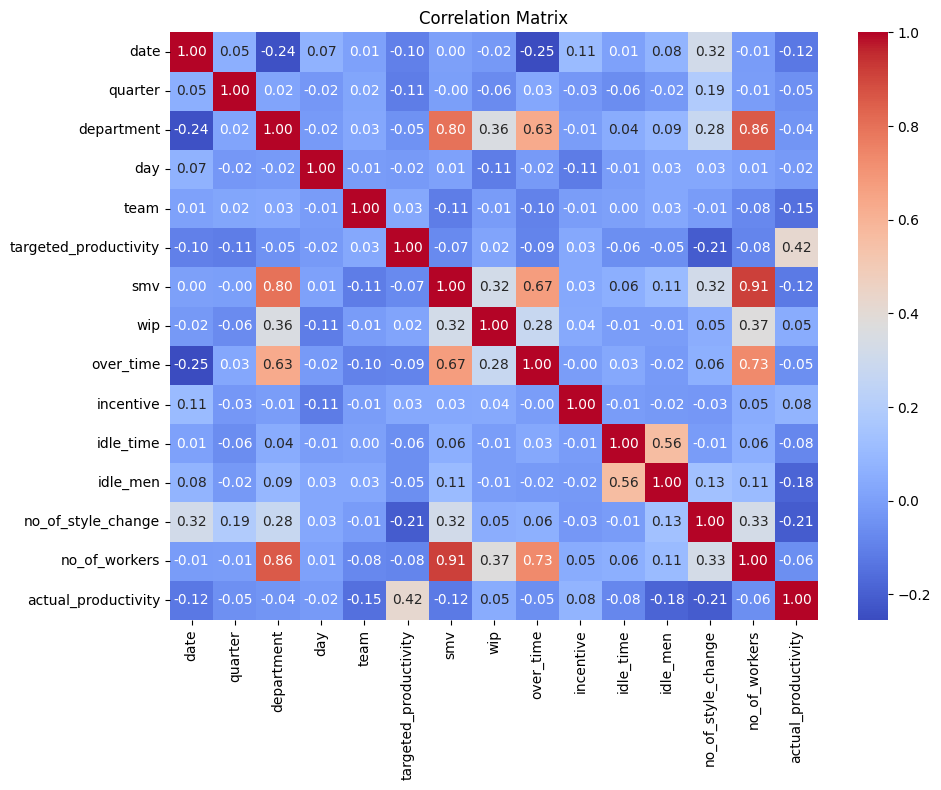

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity
Population Mean,6.426901,15.062172,687.22807,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
Sample Means,{6.430753138075313},{15.115946652719666},{683.7995815899582},{4581.543933054394},{37.40889121338912},{0.7055439330543933},{0.33441422594142256},{35.25847280334729},{0.7338986627584727}
H0_accepted,122,129,77,116,64,9,83,116,119
H0_rejected,117,110,162,123,175,230,156,123,120
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig..."


In [ ]:
comperativeColumn_result

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship
quarter,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship
department,There is a relationship,There is a relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
day,There is a relationship,There is a relationship,There is no relationship,NaN,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship
team,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
targeted_productivity,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship
smv,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
wip,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
over_time,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
incentive,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship


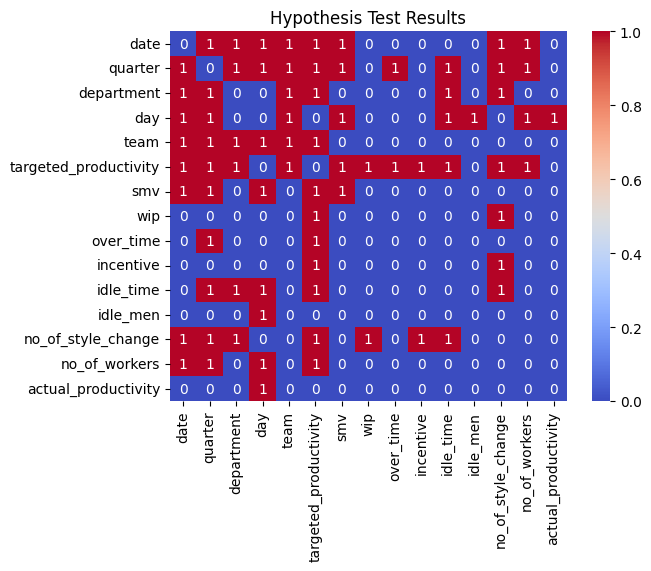

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

# **Data Visualization**

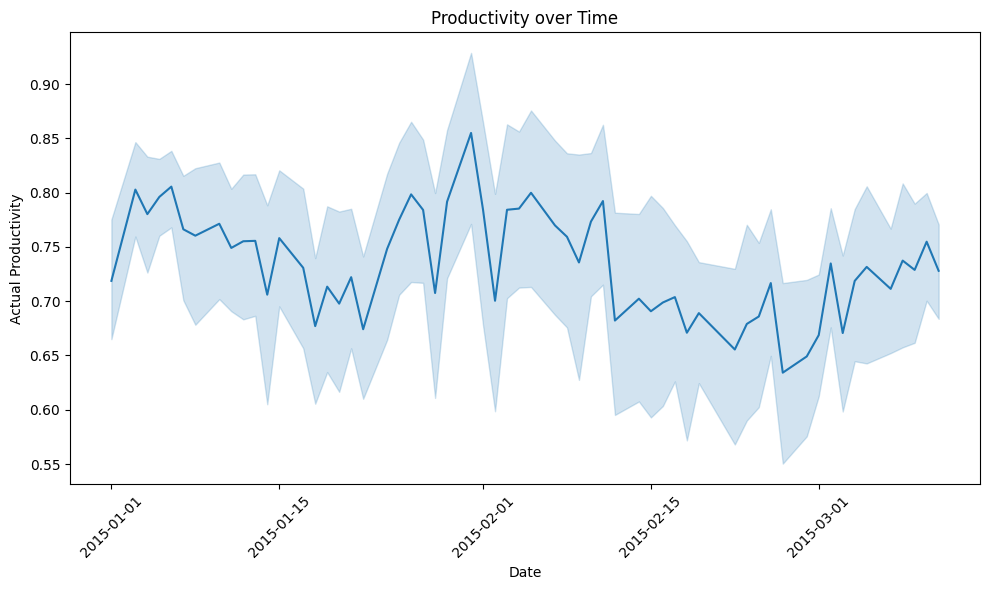

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='actual_productivity', data=df)
plt.title('Productivity over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

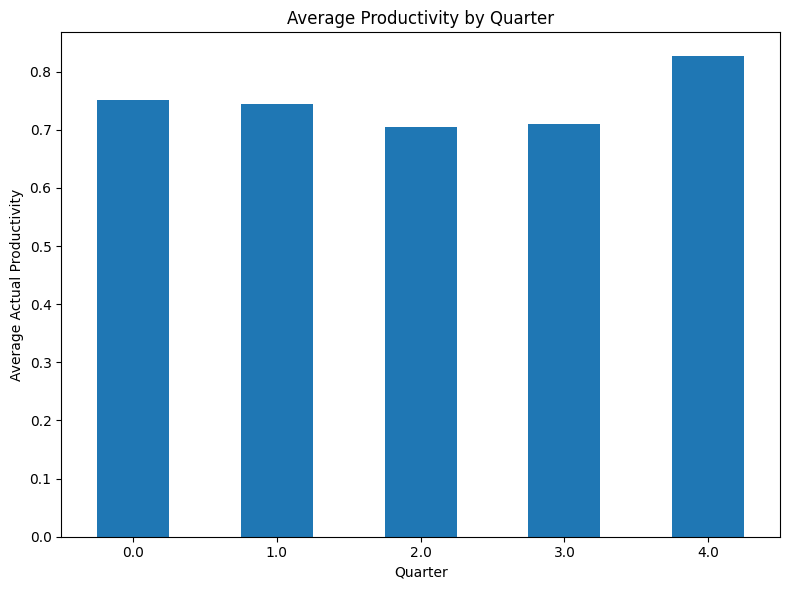

In [48]:
# Bar plot of Productivity by Quarter
plt.figure(figsize=(8, 6))
df.groupby('quarter')['actual_productivity'].mean().plot(kind='bar')
plt.title('Average Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Actual Productivity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

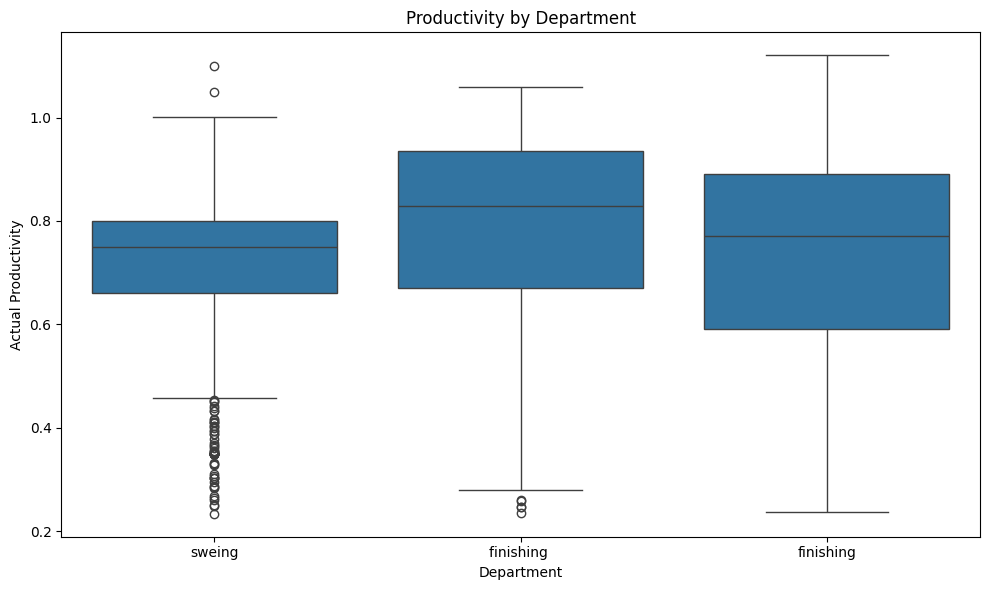

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='actual_productivity', data=df)
plt.title('Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.tight_layout()
plt.show()

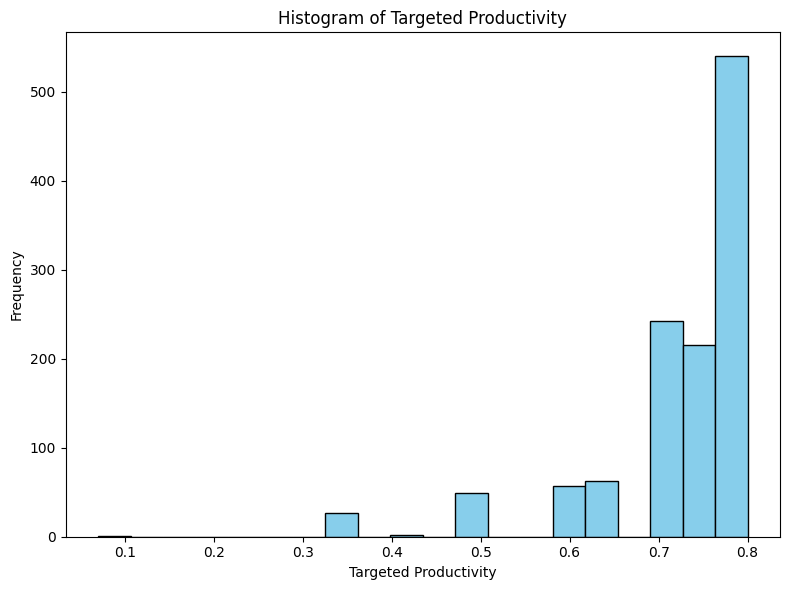

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(df['targeted_productivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

**2 separating independent and dependent**

In [72]:
x = df.drop("actual_productivity", axis = 1 )
y = df.actual_productivity

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.9)

**3 Identifying algorithms/Model:**

In [64]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train,x_test,y_train,y_test)

print(models)

 79%|███████▊  | 33/42 [00:03<00:00, 11.41it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:04<00:00,  9.01it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 1077, number of used features: 11
[LightGBM] [Info] Start training from score 0.733410
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.23       0.32  0.13        0.56
HistGradientBoostingRegressor                0.21       0.30  0.13        0.35
NuSVR                                        0.19       0.29  0.13        0.19
ExtraTreesRegressor                          0.19       0.28  0.13        0.39
SVR                                          0.19       0.28  0.13        0.09
LGBMRegressor                              

**4 training**

In [74]:
model = ExtraTreesRegressor(max_depth = 25).fit(x_train,y_train)
y_pred=model.predict(x_test)

**5 Evaluation**

In [86]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.014381335278591794, 0.6113630767726117)